# **Detekcija lica**
 *Projekat iz predmeta Principi prezentacije i prepoznavanje oblika*


## Sadržaj


1.   Uvod
2.   Opis problema
3.   Korišćene biblioteke
4.   Set podataka
5.   Detekcija lica pomoću Viola Jones/Haar-like i Adaboost Cascade
6.   Detekcija lica pomoću HOG karakteristika (HOG + Linear SVM)
7.   Detekcija lica pomoću MMOD CNN
8.   Detekcija lica pomoću MTCNN
8. Evaluacija
4. Zaključak
9.   Literatura


## Uvod

Tokom poslednjih nekoliko godina prepoznavanje lica je veoma cenjeno i smatra se jednim od najperspektivnijih primena u oblasti analize fotografije. Detekcija lica je važan deo prepoznavanja lica. U ovom radu je obrađena primena, analiza i poređenje različitih tehnika za detekciju lica. Tehnike o kojima će biti reči u nastavku su Viola Jones/Haar-like i Adaboost Cascade, detekcija lica pomoću HOG karakteristika kao i detekcija lica koristeći konvolucione neuronske mreže.





## Opis problema

Sa povećanjem baze podataka digitalnih fotografija i video zapisa, postoji potreba za automatskim razumevanjem i ispitivanjem informacija od strane inteligentnih sistema.
Detekcija objekata je jedna od tehnologija koja je povezana sa obradom slike i kompjuterskom vizijom i koja se bavi otkrivanjem instanci semantičkih objekata određene klase (na primer lice, automobil, saobraćajni znak) u digitalnim fotografijama i video zapisima. Kada je detekcija lica u pitanju, primarni cilj ove tehnologije je određivanje da li na fotografiji postoji lice ili ne, odnosno određivanje lokacije i veličine ljudskog lica na digitalnoj slici. Metod detekcije lica na fotografijama je komplikovan zbog prisutnih varijacija na licima ljudi kao što su poza, izraz, položaj i orijentacija, boja kože, naočare ili kosa na licu, razlike u kameri, osvetljenju i rezoluciji fotografije.

Lice ima veoma veliki značaj u prenošenju identiteta i osećanja osobe. Iz ovog razloga automatski sistem za detekciju lica ima važnu ulogu u prepoznavanju lica, prepoznavanju izraza lica, interakciji između čoveka i računara, proceni položaja glave i drugim primenama. 

Yan, Kriegman i Ahuja su predstavili klasifikaciju metoda za detekciju lica. Metode su podeljene u četiri kategorije, sa tim što algoritmi za detekciju lica mogu pripadati i 2 i više kategorija. Kategorije su sledeće:


1.   Detekcija lica zasnovana na karakteristikama (*Feature-based*) - locira lica ekstraktovanjem njegovih strukturalnih karakteristika. Prvo se trenira kao klasifikator koji se koristi za razlikovanje regije lica i regija koje nisu lice.
2.   Detekcija lica zasnovana na znanju (*Knowledge-based*) - oslanja se na set pravila i ljudsko znanje prilikom detekcije lica (primer: Lice ima nos, oči i usta na određenoj međusobnoj udaljenosti i poziciji). Problemi metoda ove kategorije su teško kreiranje odgovarajućeg seta pravila i nemogućnost detektovanja više lica na više fotografija.
3.   Detekcija lica zasnovana na podudaranju šablona (*Templatematching*) - koristi predefinisane ili parametrizovane šablone lica za detekciju lica na osnovu korelacije šablona i ulaznih slika. 
4.   Detekcija lica zasnovana na izgledu (*Appearance-based*) - koristi skup fotografija lica za obuku delegata kako bi se otkrili modeli lica. Ovaj metod ima bolje performanse od prethodno navedenih. Oslanja se na tehnike iz statističke analize i mašinskog učenja da bi se pronašle relevantne karakteristike slika lica. Ovaj metod se takođe koristi za ekstrakciju karakteristika za prepoznavanje lica.

Postupak detekcije lica se sastoji od nekoliko koraka. Prvi korak je učitavanje fotografije i transformisanje fotografije iz RGB u Grayscale radi jednostavnije detekcije. Nakon toga se po potrebi mogu izvršiti manipulacije poput promene veličine, sečenja, zamućivanja ili izoštravanja fotografije. Zatim se vrši segmentacija slike i primenjuje se algoritam poput Viola Jones/Haar-like za detekciju lica. Na kraju iscrtava se na fotografiju pravougaonik u kojem se očekuje da se nalazi lice.







## Korišćene biblioteke
Prilikom izrade ovog rada korišćene su sledeće biblioteke:


*   OpenCV
*   NumPy
*   Matplotlib
*   Dlib
*   MTCNN

### OpenCV
OpenCV je opensource biblioteka za kompjutersku viziju i mašinsko učenje. Biblioteka ima više od 2500 optimizovanih algoritama, što uključuje sveobuhvatan skup klasičnih i najsavremenijih algoritama kompjuterskog vida i mašinskog učenja. Ovi algoritmi se mogu koristiti za otkrivanje i prepoznavanje lica, identifikaciju objekata, klasifikaciju ljudskih akcija u video zapisima, praćenje kretanja kamere, praćenje objekata u pokretu, izdvajanje 3D modela objekata i mnogo drugih primena. 

U ovom radu se OpenCV koristi za učitavanje i transformisanje fotografija, iscrtavanje pravougaonika i krugova na fotografijama i za detekciju lica koristeći *CascadeClassifier*.

### Dlib
Dlib je biblioteka za pravljenje aplikacija za mašinsko učenje i analizu podataka u C++. Iako je biblioteka prvobitno napisana u C++, može da se koristi i prilikom razvoja Python aplikacija. Sadrži veliki broj algoritama mašinskog učenja, numeričkih algoritama i api za obradu fotografija.

Prilikom izrade ovog rada upotrebljene su metode *get_frontal_face_detector()* i *cnn_face_detection_model_v1()* za instanciranje detektora lica.

### MTCNN
MTCNN je Python biblioteka koju je napisao Github korisnik ipacz. Ova biblioteka implementira naučni rad Zhang, Kaipeng et al. *“Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.*”

U ovom radu se koristi MTCNN detektor biblioteke i metoda *detect_faces()*.


Instaliramo i importujemo potrebne biblioteke.




In [180]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [181]:
#import biblioteka
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib
from mtcnn.mtcnn import MTCNN
import os
from PIL import Image 

## Set podataka
Set podataka korišćen u svrhu izrade ovog rada se nalazi na sledećem linku: https://drive.google.com/drive/folders/1tMgTcSmo5wN0_m2jClNQfEcHOx3I8168?usp=sharing

Set podataka se sastoji od ukupno 274 kropovane fotografije lica glumaca:


*   Chris Evans (50 fotografija)
*   Chris Hemsworth (53 fotografije)
*   Mark Ruffalo (66 fotografija)
*   Robert DowneyJr (51 fotografijan)
*   Scarlett Johansson (54 fotografije)

Fotografije učitavamo koristeći metogu *imread()* biblioteke OpenCV i vršimo transformaciju iz RGB u Grayscale radi lakše obrade. Takođe, vršimo promenu veličine svih fotografija.

In [182]:
#mauntovanje drajva
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
def resize_images_in_dir(dir_path):
  files = os.listdir(dir_path)
  dim = (126, 126)
  save_dir = "/content/drive/MyDrive/resized_images"
  for filename in files:
    img = cv2.imread(dir_path +"/"+ filename)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(save_dir +"/"+ filename, resized)

# resize_images_in_dir("/content/drive/MyDrive/cropped_images/chris_evans")
# resize_images_in_dir("/content/drive/MyDrive/cropped_images/chris_hemsworth")
# resize_images_in_dir("/content/drive/MyDrive/cropped_images/mark_ruffalo")
# resize_images_in_dir("/content/drive/MyDrive/cropped_images/robert_downey_jr")
# resize_images_in_dir("/content/drive/MyDrive/cropped_images/scarlett_johansson")


#ucitavanje slike
original_image = cv2.imread("/content/drive/MyDrive/resized_images/chris_evans23.png")
#konvertovanje u grayscale radi lakseg rada sa slikom
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

## Detekcija lica pomoću Viola Jones/Haar-like i Adaboost Cascade

Viola Jones je pristup brzoj detekciji objekata sa mogućnošću pokretanja od 15 frejmova u sekundi. Bio je prvi koji je postigao detekciju objekata u realnom vremenu.

Razvijen od strane Paul Viola i Michael Jonesa 2001. godine, Viola-Jones Object Detection Framevork može brzo i precizno otkriti objekte na slikama i posebno dobro funkcioniše sa ljudskim licem. Frejmvork za otkrivanje objekata Viola-Jones kombinuje koncepte Haar-like karakteristika, integralnih slika, AdaBoost algoritma i kaskadnog klasifikatora da bi stvorio sistem za detekciju objekata koji je brz i precizan.

**Haar-like** karakteristike su korisne karakteristike fotografije koje se koriste u detekciji objekata. Haar-like karakteristika se sastoji od tamnih i svetlih regiona. Proizvodi jednu vrednost koja se izračunava kao razlika zbira intenziteta svetlih regiona i zbira intenziteta tamnih regiona.

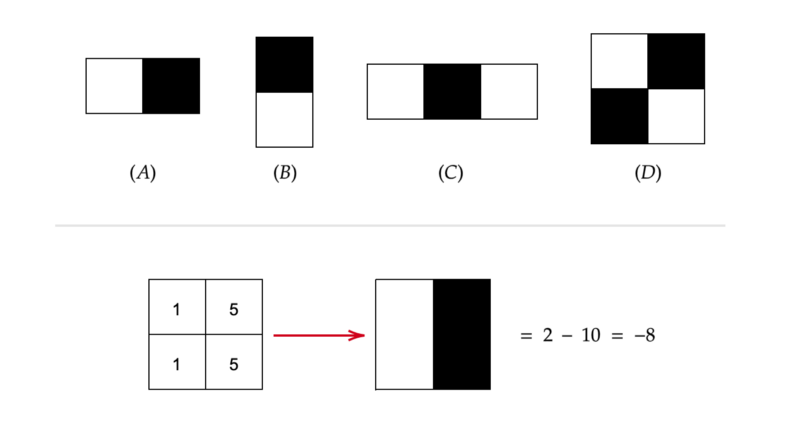

**Integralna slika** je reprezentacija fotografije gde je vrednost lokacije (x, y) na integralnoj fotografiji jednaka zbiru piksela iznad i levo (uključivo) od (x, y) lokacije na originalnoj fotografiji. Ova reprezentacija fotografije omogućava brzo računanje pravougaonog regiona. Pošto proces izdvajanja Haar-like karakteristika uključuje izračunavanje zbira tamnih/svetlih pravougaonih regiona, uvođenje Integralnih slika u velikoj meri skraćuje vreme potrebno za izvršavanje ovog zadatka.

Algoritam **AdaBoost** (Adaptive Boosting) je algoritam mašinskog učenja za odabir najboljeg podskupa karakteristika među svim dostupnim karakteristikama. Izlaz algoritma je klasifikator nazvan *jaki klasifikator* koji se sastoji od linearnih kombinacija *slabih klasifikatora*.

**Kaskadni klasifikator** je klasifikator sa više faza koji može da izvrši detekciju brzo i tačno. Svaka faza se sastoji od jakog klasifikatora koji proizvodi AdaBoost algoritam. Od jedne do druge faze, broj slabih klasifikatora u jakom se povećava. Ulaz se procenjuje na sekvencijalno. Ako klasifikator za određenu fazu daje negativan rezultat, ulaz se odmah odbacuje. U slučaju da je izlaz pozitivan (prođe se faza), ulaz se prosleđuje na sledeću fazu. Prema Viola & Jones (2001), ovaj višestepeni pristup omogućava izgradnju jednostavnijih klasifikatora koji se zatim mogu koristiti za brzo odbacivanje većine negativnih (bez lica) ulaza, dok se troši više vremena na pozitivni (lice) ulaz.

Prednost je u tome što će većina slike biti negativna tokom prvih nekoliko faza, što znači da algoritam neće gubiti vreme na nepotrebne kalkulacije. Umesto sati, detekcija lica se sada može obaviti u realnom vremenu.

Same kaskade su XML datoteke koje sadrže OpenCV podatke koji se koriste za detekciju objekata.

U ovom radu istanciraćemo *CascadeClassifier* iz openCV biblioteke sa *haarcascade_frontalface_default.xml* kaskadom.

In [184]:
#Instanciranje CascadeClassifier iz openCV biblioteke. 
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")

Funkcija *detectMultiScale()* vrši detekciju objekata. S obzirom da je pozivamo nad kaskadom za lica, vršiće detekciju lica na fotografiji.

Parametri ove funkcije su:


*   fotofrafija Grayscale
*   scaleFactor - kako neka lica na fotografiji mogu biti bliže kameri, ona deluju veće nego lica koja su dalje od kamere. ScaleFactor rešava ovaj problem. Određuje u kojoj meri se veličina fotografije smanjuje za svaku skalu fotografije.
*   minNeighbors - definiše koliko objekata se detektuje blizu trentnog pre nego što se označi da je lice pronađeno.
*   minSize - definiše veličinu prozora

Funkcija vraća listu pravougaonika u kojima veruje da je pronašla lice. Iteriramo kroz listu kako bismo iscrtali pravougaonike na ulaznoj fotografiji i prikazujemo je.

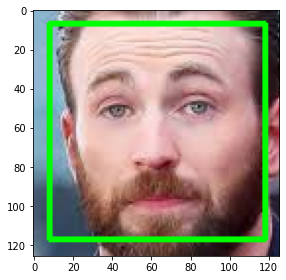

In [185]:
#Kljucni deo koda - detektuje lica

#detectMultiScale - funkcija koja se koristi za detekciju objekata - ovde lica jer je zovemo nad kaskadom za lica
#parametri:
  # gray - slika koju smo u prethodnoj celiji prebacili u grayscale
  # scaleFactor -  u kojoj meri se veličina fotografije smanjuje za svaku skalu fotografije, znaci nam kada su neki objekti blize a neki dalje na slici
  # minNeighbors - koliko objekata se detektuje blizu trentnog pre nego sto se oznaci da je lice pronadjeno
  # minsize - velicina prozora
faces = face_classifier.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

# Iscrtavanje pravougaonika
for (x, y, w, h) in faces:
    casc_img = cv2.rectangle(original_image.copy(), (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(casc_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()

## Detekcija lica pomoću HOG karakteristika (HOG + Linear SVM)
Ova tehnika za detekciju lica se zasniva na upotrebi HOG (*Histogram of Oriented Gradients*) deskriptoru i linearnom SVM (*Support Vector Machine*) za detekciju lica na fotografijama.

HOG je jednostavan i moćan deskriptor karakteristika. Ne koristi se samo za detekciju lica, već se široko koristi i za detekciju objekata poput automobila, kućnih ljubimaca i voća. HOG je robustan za detekciju objekata jer se oblik objekta karakteriše korišćenjem distribucije gradijenta lokalnog intenziteta i pravca ivice. Ideja HOG-a je da se fotografija podeli na ćelije. Izračunava se histogram za svaku ćeliju, a zatim se formira jedan histogram od svih svih histograma koji je jedinstven za svako lice. Problem ovog pristupa je što loše radi kada su lica pod čudnim uglom, radi samo kada su lica postavljena ravno. Iz ovog razloga ova tehnika je dobar izbor za primene poput detekcije lista sa skeniranih dokumenata, ali će imati loše performanse ako se primeni na real-time video.

Koristimo metodu *get_frontal_face_detector()* biblioteke Dlib da istanciramo i primenimo HOG detektor.

In [186]:
# Instanciramo hog detektor
hog_detector = dlib.get_frontal_face_detector()

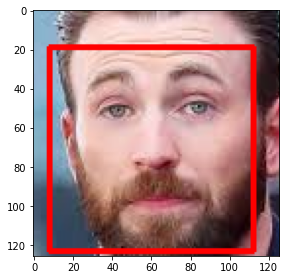

In [187]:
faces = hog_detector(original_image.copy(), 0)
for face in faces:
    l,t,r,b = face.left(), face.top(), face.right(), face.bottom()
    hog_img = cv2.rectangle(original_image.copy(),(l,t),(r,b),(0,0,255),2)
plt.imshow(cv2.cvtColor(hog_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()

## Detekcija lica pomoću MMOD CNN

Za detekciju lica pomoću MMOD CNN koristi se treniran model: https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2
  
Model je MMOD (Max-Margin Object Detection) CNN detektor lica iz Dlib biblioteke.

Autor Davis King je trenirao ovaj model na setu podataka na linku: http://dlib.net/files/data/dlib_face_detection_dataset-2016-09-30.tar.gz. Set podataka se sastoji od fotografija sa ImageNet, AFLW, Pascal VOC, VGG dataset, WIDER, i face scrub.

MMOD se može koristiti za poboljšanje bilo koje metode detekcije objekata koja je linearna u naučenim parametrima, kao što je HOG. MMOD CNN detektor lica, rešava problem HOG detektora, odnosno omogućava detekciju lica pod različitim uglovima i uslovima osvetljenja. Veoma je precizan i robustan. Sporiji je od HOG detektora, ali daje bolje rezultate. Međutim, važna prednost ovog detektora je i činjenica da može da se izvršava na NVIDIA grafičkoj kartici, što ga čini dobrim izborom kada koristimo grafičku karticu prilikom detekcije lica.

In [188]:
mmod_model_path = "/content/drive/MyDrive/mmod_human_face_detector.dat"
mmod_detector = dlib.cnn_face_detection_model_v1(mmod_model_path)

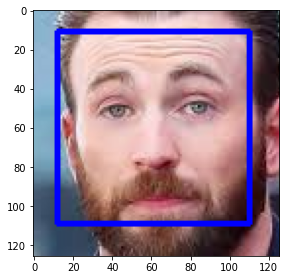

In [189]:
# parametri: grayscale slika, broj upsamplovanja slike pre nego sto se uradi detekcija
faces = mmod_detector(img=original_image.copy(), upsample_num_times=1)
for face in faces:
    rect = face.rect
    l,t,r,b = rect.left(), rect.top(), rect.right(), rect.bottom()
    mmod_img = cv2.rectangle(original_image.copy(),(l,t),(r,b),(255,0,0),2)
plt.imshow(cv2.cvtColor(mmod_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()


## Detekcija lica pomoću MTCNN 

MTCNN ili *Multi-Task Cascaded Convolutional Neural Network* je tehnika za detekciju lica na fotografijama koristeći deep learning model.

MTCNN je popularan jer je postigao veoma dobre rezultate na nizu referentnih skupova podataka i zato što je sposoban da prepozna i druge karakteristike lica kao što su oči i usta, što se naziva detekcija orijentira (*landmarks*).

Mreža koristi kaskadnu strukturu sa tri mreže; prvo se fotografija preskalira na opseg različitih veličina (naziva se piramida fotografije), zatim prvi model (*Proposal Network* ili P-Net) predlaže regione lica kandidata, drugi model (*Refine Network* ili R-Net) filtrira *bounding box*-ove, a treći model (*Output Network* ili O-Net) predlaže *landmarks*.

Model se naziva multi-task mrežom jer svaki od tri modela kaskade (P-Net, R-Net i O-Net) se obučavaju na tri zadatka, poput tri tipa predikcija: klasifikacija lica, regresija *bounding box*-ova i lokalizacija *landmarks* lica. Ovi modeli nisu direktno povezani - izlaz jedne faze je ulaz u narednu fazu što omogućava dodatnu obradu između faza.

Mrežu instanciramo pozivom konstruktora *MTCNN()*. Funkcija detect_faces() vrši detekciju lica.

In [190]:
mtcnn_detector = MTCNN()

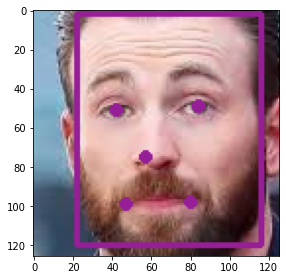

In [191]:
faces = mtcnn_detector.detect_faces(original_image.copy())
for face in faces:
  x, y, w, h = face['box']
  mtcnn_img = cv2.rectangle(original_image.copy(), (x, y), (x+w, y+h), (150, 30, 150), 2)
  for key, value in face['keypoints'].items():
    # create and draw dot
    mtcnn_img = cv2.circle(mtcnn_img,value, 2, (150, 30, 150), 2)
plt.imshow(cv2.cvtColor(mtcnn_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()

## Evaluacija
U svrhe evaluacije se vrši izračunavanje IoU (*Intersection over Union*), *precission i recall*.

Kako na fotografijama nisu označeni *ground truth boxes*, ovo je urađeno ručno koristeći labelImg alat. Označeno je oko 20% fotografija iz seta podataka, prilikom čega se vodilo računa o rasporedli seta podataka.

Podaci o ground truth boxes se nalaze u bboxes.csv fajlu na linku: https://drive.google.com/file/d/1IHp3q-WXFKtlZKfjaJCE_3_aLU6Swe9H/view?usp=sharing

Fajl učitavamo u DataFrame biblioteke pandas.

In [192]:
import pandas as pd
df = pd.read_csv ('/content/drive/MyDrive/resized_images/bboxes.csv')
print(df)

                    filename  x_top  y_top  x_down  y_down
0           chris_evans1.png     14     24     119     124
1          chris_evans11.png     10     19     108     126
2          chris_evans13.png     24     23     105     121
3          chris_evans14.png     16     22     113     123
4          chris_evans17.png     17     19     112     126
5           chris_evans2.png     11     19     114     125
6          chris_evans22.png     21     23     115     126
7          chris_evans24.png     10     24     112     125
8          chris_evans27.png     26     27     111     122
9           chris_evans3.png     16     16     113     125
10         chris_evans30.png     21     19     112     125
11      chris_hemsworth1.png     15     23     113     122
12     chris_hemsworth11.png     12     25     113     124
13     chris_hemsworth12.png     10     23     103     126
14     chris_hemsworth13.png     12     15     113     126
15     chris_hemsworth17.png     21     22     119     1

IoU je kvantitivna mera kojom se ocenjuju u kojoj meri se preklapaju ground truth boxes i predikcije. Metoda *intersection_over_union(gt_box, pred_box)* računa IoU.

In [193]:
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou


In [194]:
iou_threshold = 0.65

average_haar_iou = 0
counter = 0
tp_haar = 0
fp_haar = 0
fn_haar = 0
haar_pred = np.zeros(54)

average_hog = 0
hog_counter = 0
tp_hog = 0
fp_hog = 0
fn_hog = 0
hog_pred = np.zeros(54)

average_mmod = 0
mmod_counter = 0
tp_mmod = 0
fp_mmod = 0
fn_mmod = 0
mmod_pred = np.zeros(54)

average_mtcnn = 0
mtcnn_counter = 0
tp_mtcnn = 0
fp_mtcnn = 0
fn_mtcnn = 0
mtcnn_pred = np.zeros(54)

tn = 0

general_cnt =  0

for filename in df["filename"]:
  image_path = "/content/drive/MyDrive/resized_images/" + filename 
  image = cv2.imread(image_path)
  gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
  row = df.loc[df["filename"] == filename]
  gt_box = [row.x_top.values[0], row.y_top.values[0], row.y_down.values[0] - row.y_top.values[0], row.x_down.values[0] - row.x_top.values[0]]
  
  
  #Viola
  faces = face_classifier.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
    )
  if(len(faces) == 0):
      fn_haar+=1
  
  for (x, y, w, h) in faces:
    counter+=1
    pred_box = [x, y, w, h]
    iou = intersection_over_union(gt_box, pred_box)
    haar_pred[general_cnt] = iou
    if(iou>iou_threshold):
      tp_haar +=1
    else:
      fp_haar +=1
    average_haar_iou += iou

  #HOG
  faces = hog_detector(image.copy(), 0)
  if(len(faces) == 0):
      fn_hog+=1
  for face in faces:
      l,t,r,b = face.left(), face.top(), face.right(), face.bottom()
      pred_box = [l, t, r-l, b-t]
      hog_counter+=1
      iou = intersection_over_union(gt_box, pred_box)
      hog_pred[general_cnt] = iou
      if(iou>iou_threshold):
        tp_hog +=1
      else:
        fp_hog +=1
      average_hog += iou

  #MMOD
  faces = mmod_detector(img=original_image.copy(), upsample_num_times=1)
  if(len(faces) == 0):
      fn_mmod+=1
  for face in faces:
      rect = face.rect
      l,t,r,b = rect.left(), rect.top(), rect.right(), rect.bottom()
      pred_box = [l, t, r-l, b-t]
      mmod_counter+=1
      iou = intersection_over_union(gt_box, pred_box)
      mmod_pred[general_cnt] = iou
      if(iou>iou_threshold):
        tp_mmod +=1
      else:
        fp_mmod +=1
      average_mmod += iou

  #MTCNN
  faces = mtcnn_detector.detect_faces(original_image.copy())
  if(len(faces) == 0):
      fn_mtcnn+=1
  for face in faces:
    x, y, w, h = face['box']
    pred_box = [x, y, w, h]
    mtcnn_counter+=1
    iou = intersection_over_union(gt_box, pred_box)
    mtcnn_pred[general_cnt] = iou
    if(iou>iou_threshold):
      tp_mtcnn +=1
    else:
      fp_mtcnn +=1
    average_mtcnn += iou

    general_cnt+=1


average_haar_iou = average_haar_iou/counter
precision_haar = tp_haar/(tp_haar+fp_haar)
recall_haar = tp_haar/(tp_haar+fn_haar)
print("Prosecan IOU Haar:" + str(average_haar_iou) + ", broj true positive: " + str(tp_haar))
print("Haar precision: " + str(precision_haar))
print("Haar recall: " + str(recall_haar))
print("\n")
average_hog = average_hog/hog_counter
precision_hog = tp_hog/(tp_hog+fp_hog)
recall_hog = tp_hog/(tp_hog+fn_hog)
print("Prosecan IOU HOG:" + str(average_hog) + ", broj true positive: " + str(tp_hog))
print("HOG precision: " + str(precision_hog))
print("HOG recall: " + str(recall_hog))
print("\n")
average_mmod = average_mmod/mmod_counter
precision_mmod = tp_mmod/(tp_mmod+fp_mmod)
recall_mmod = tp_mmod/(tp_mmod+fn_mmod)
print("Prosecan IOU MMOD:" + str(average_mmod) + ", broj true positive: " + str(tp_mmod))
print("MMOD precision: " + str(precision_mmod))
print("MMOD recall: " + str(recall_mmod))
print("\n")

average_mtcnn = average_mtcnn/mtcnn_counter
precision_mtcnn = tp_mtcnn/(tp_mtcnn+fp_mtcnn)
recall_mtcnn = tp_mtcnn/(tp_mtcnn+fn_mtcnn)
print("Prosecan IOU MTCNN:" + str(average_mtcnn) + ", broj true positive: " + str(tp_mtcnn))
print("MTCNN precision: " + str(precision_mtcnn))
print("MTCNN recall: " + str(recall_mtcnn))

Prosecan IOU Haar:0.7329909190431351, broj true positive: 50
Haar precision: 0.9259259259259259
Haar recall: 1.0


Prosecan IOU HOG:0.8123133834256424, broj true positive: 51
HOG precision: 0.9444444444444444
HOG recall: 1.0


Prosecan IOU MMOD:0.7369182032132803, broj true positive: 52
MMOD precision: 0.9629629629629629
MMOD recall: 1.0


Prosecan IOU MTCNN:0.7068061064864966, broj true positive: 49
MTCNN precision: 0.9074074074074074
MTCNN recall: 1.0


Rezultati su sledeći za IoU prag 0.65:

####  Viola Jones/Haar-like i Adaboost Cascade
* Prosečan IOU Haar:0.7329909190431351, broj true positive: 50

* Haar precision: 0.9259259259259259

* Haar recall: 1.0

####  HOG + Linear SVM
* Prosečan IOU HOG:0.8123133834256424, broj true positive: 51

* HOG precision: 0.9444444444444444

* HOG recall: 1.0

####MMOD CNN
* Prosečan IOU MMOD:0.7369182032132803, broj true positive: 52

* MMOD precision: 0.9629629629629629

* MMOD recall: 1.0

#### MTCNN
* Prosecan IOU MTCNN:0.7068061064864966, broj true positive: 49

* MTCNN precision: 0.9074074074074074

* MTCNN recall: 1.0

## Zaključak
Detekcija lica je važan deo prepoznavanja lica. U ovom radu je obrađena primena, analiza i poređenje različitih tehnika za detekciju lica.

Različite tehnike daju različite rezultate. Evaluacija nam je pokazala da sve tehnike pronalaze lice na slikama. Od ukupno 54 lica, najviše true positive ima MMOD CNN, 52 true positive i sa tim najveću preciznost. Na ovom konkretnom setu podataka se najbolje pokazalo MMOD CNN rešenje.

Lice ima veoma veliki značaj u prenošenju identiteta i osećanja osobe. Iz ovog razloga automatski sistem za detekciju lica ima važnu ulogu u prepoznavanju lica, prepoznavanju izraza lica, interakciji između čoveka i računara, proceni položaja glave i drugim primenama.

##Literatura
*  P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001, 2001, pp. I-I, doi: 10.1109/CVPR.2001.990517.

*  https://realpython.com/face-recognition-with-python/

*  https://towardsdatascience.com/understanding-face-detection-with-the-viola-jones-object-detection-framework-c55cc2a9da14

*  https://towardsdatascience.com/face-detection-for-beginners-e58e8f21aad9

*  https://pyimagesearch.com/2021/04/19/face-detection-with-dlib-hog-and-cnn/

*  https://medium.com/mlcrunch/face-detection-using-dlib-hog-198414837945

*  https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

*  https://towardsdatascience.com/step-by-step-face-recognition-code-implementation-from-scratch-in-python-cc95fa041120
